## PCT Functions

In [ ]:
from pct.functions import Integration 
from pct.functions import Constant
from pct.functions import Sigmoid
from pct.functions import PassOn
from pct.putils import FunctionsList

In [ ]:
cons = Constant(2)
integrator = Integration(gain=9, slow=10)

In [ ]:
integrator.add_link(cons)

In [ ]:
out = integrator()
print(out)

1.8


In [ ]:
o=integrator.run(steps=10, verbose=True)

3.420 4.878 6.190 7.371 8.434 9.391 10.252 11.026 11.724 12.351 

In [ ]:
import numpy as np
input=np.ones((3, 3))*2
input

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [ ]:
cons = Constant(input)
integrator = Integration(gain=9, slow=10)
integrator.add_link(cons)
out = integrator()
print(out)

[[1.8 1.8 1.8]
 [1.8 1.8 1.8]
 [1.8 1.8 1.8]]


In [ ]:
from pct.functions import WeightedSum
ws = WeightedSum(weights=np.ones(3))
ws.add_link(Constant(10))
ws.add_link(Constant(5))
ws.add_link(Constant(20))

In [ ]:
ws.summary()

weighted_sum WeightedSum | weights [1. 1. 1.] | 0 | links  constant2 constant3 constant4 


In [ ]:
print(ws.get_config())

{'type': 'WeightedSum', 'name': 'weighted_sum', 'value': 0, 'links': {0: 'constant2', 1: 'constant3', 2: 'constant4'}, 'weights': [1.0, 1.0, 1.0]}


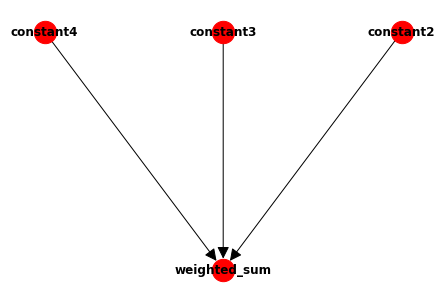

In [ ]:
ws.draw()

## Nodes

In [ ]:
from pct.nodes import PCTNode

In [ ]:
node = PCTNode()

In [ ]:
node.summary()

pctnode PCTNode
----------------------------
REF: constant5 Constant | 1 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  constant5 variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------


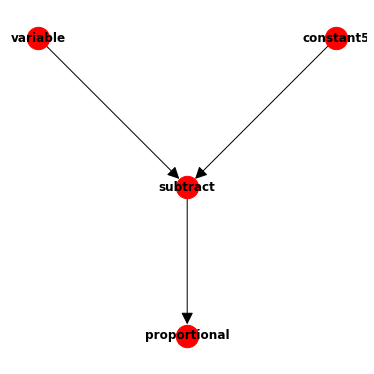

In [ ]:
node.draw()

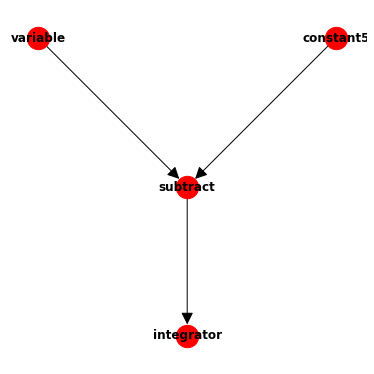

In [ ]:
integ = Integration(10, 100, name="integrator", links=['subtract'], position=-1)
node.insert_function(collection = "output", function=integ)
node.draw()

In [ ]:
out =node()
out

0.1

In [ ]:
node.run(steps=10, verbose=True)

1.000 0.000 1.000 0.199 
1.000 0.000 1.000 0.297 
1.000 0.000 1.000 0.394 
1.000 0.000 1.000 0.490 
1.000 0.000 1.000 0.585 
1.000 0.000 1.000 0.679 
1.000 0.000 1.000 0.773 
1.000 0.000 1.000 0.865 
1.000 0.000 1.000 0.956 
1.000 0.000 1.000 1.047 


1.0466174574128355

## Hierarchies

In [ ]:
from pct.hierarchy import PCTHierarchy

In [ ]:
hpct = PCTHierarchy(2, 2, links="dense")

In [ ]:
hpct.summary()

pcthierarchy PCTHierarchy
**************************
PRE: None
Level 0
level0col0 PCTNode
----------------------------
REF: weighted_sum WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable Variable | 0 
COM: subtract Subtract | 0 | links  weighted_sum variable 
OUT: proportional Proportional | gain 10 | 0 | links  subtract 
----------------------------
level0col1 PCTNode
----------------------------
REF: weighted_sum1 WeightedSum | weights [1. 1.] | 0 | links  proportional2 proportional3 
PER: variable1 Variable | 0 
COM: subtract1 Subtract | 0 | links  weighted_sum1 variable1 
OUT: proportional1 Proportional | gain 10 | 0 | links  subtract1 
----------------------------
Level 1
level1col0 PCTNode
----------------------------
REF: constant Constant | 1 
PER: weighted_sum2 WeightedSum | weights [1. 1.] | 0 | links  variable variable1 
COM: subtract2 Subtract | 0 | links  constant weighted_sum2 
OUT: proportional2 Proportional | gain 10 | 0 | links  subt

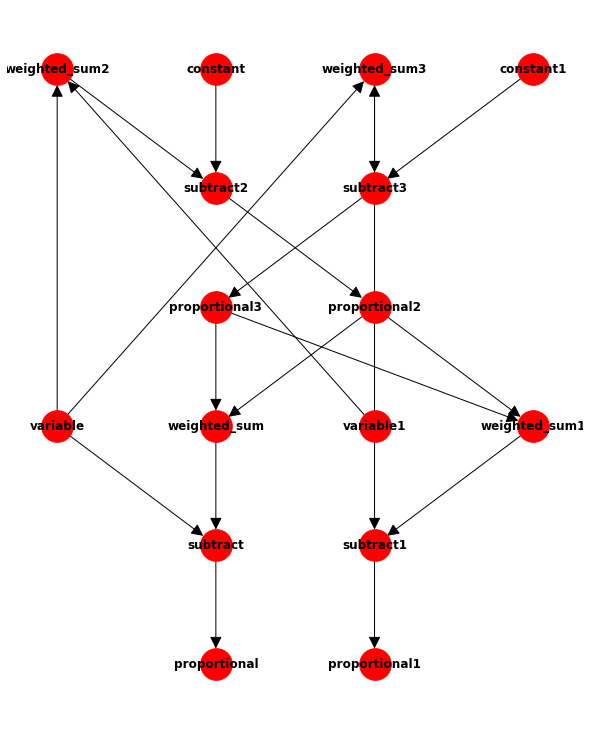

In [ ]:
hpct.draw(figsize=(8, 10), node_size=1000)

In [ ]:
FunctionsList.getInstance().clear()

In [ ]:
cartpole_hierarchy = PCTHierarchy.load("../pct/nbs/cartpole.json")

In [ ]:
cartpole_hierarchy.summary()

cartpoleh PCTHierarchy
**************************
PRE: CartPole-v1 OpenAIGym | 0 | links  greaterthan 
Level 0
cart_velocity PCTNode
----------------------------
REF: cart_velocity_reference PassOn | 0 | links  cart_position_output 
PER: cart_velocity IndexedParameter | index 1 | 0 | links  CartPole-v1 
COM: subtract Subtract | 0 | links  cart_velocity_reference cart_velocity 
OUT: force Integration | gain -0.05 slow 4  | 0 | links  subtract 
----------------------------
Level 1
cart_position PCTNode
----------------------------
REF: cart_position_reference PassOn | 0 | links  pole_velocity_output 
PER: cart_position IndexedParameter | index 0 | 0 | links  CartPole-v1 
COM: subtract1 Subtract | 0 | links  cart_position_reference cart_position 
OUT: cart_position_output Proportional | gain 2 | 0 | links  subtract1 
----------------------------
Level 2
pole_velocity PCTNode
----------------------------
REF: pole_velocity_reference PassOn | 0 | links  pole_angle_output 
PER: pole_velocity

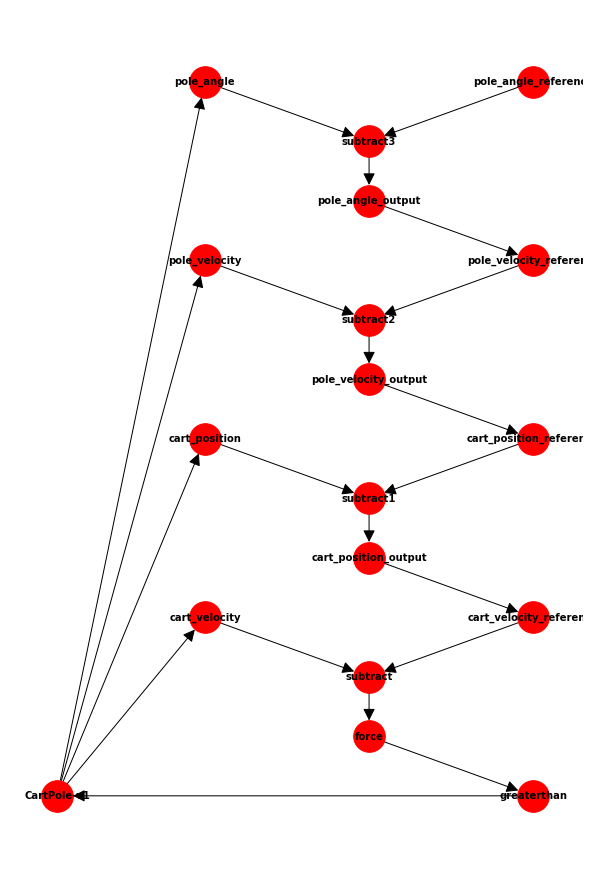

In [ ]:
cartpole = FunctionsList.getInstance().get_function("CartPole-v1")
cartpole.render=True
cartpole_hierarchy.set_order("Down")
cartpole_hierarchy.draw(font_size=10, figsize=(8,12), move={'CartPole-v1': [-0.075, 0]}, node_size=1000)

In [ ]:
cartpole_hierarchy.run(200)

0

In [ ]:
cartpole_hierarchy.summary()

cartpoleh PCTHierarchy
**************************
PRE: CartPole-v1 OpenAIGym | [ 0.00406262 -0.01673093 -0.00376337  0.02602233  0.00406262 -0.01673093
 -0.00376337  0.02602233] | links  greaterthan 
Level 3
pole_angle PCTNode
----------------------------
REF: pole_angle_reference Constant | 0 
PER: pole_angle IndexedParameter | index 2 | -0.003763368623683283 | links  CartPole-v1 
COM: subtract3 Subtract | 0.003763368623683283 | links  pole_angle_reference pole_angle 
OUT: pole_angle_output Proportional | gain 3.5 | 0.013171790182891491 | links  subtract3 
----------------------------
Level 2
pole_velocity PCTNode
----------------------------
REF: pole_velocity_reference PassOn | 0.013171790182891491 | links  pole_angle_output 
PER: pole_velocity IndexedParameter | index 3 | 0.026022331040939983 | links  CartPole-v1 
COM: subtract2 Subtract | -0.012850540858048492 | links  pole_velocity_reference pole_velocity 
OUT: pole_velocity_output Proportional | gain 0.5 | -0.006425270429024246 

In [ ]:
cartpole.close()

In [ ]:
pole_position_node = PCTNode.from_config({ 'name': 'pole_position', 
    'refcoll': {'0': {'type': 'Constant', 'name': 'pole_position_ref', 'value': 1, 'links': {}}}, 
    'percoll': {'0': {'type': 'PassOn', 'name': 'pole_position', 'value': 0, 'links': {0: 'cart_position'}}}, 
    'comcoll': {'0': {'type': 'Subtract', 'name': 'subtractpp', 'value': 0, 'links': {0: 'pole_position_ref', 1: 'pole_position'}}}, 
    'outcoll': {'0': {'type': 'Sigmoid', 'name': 'pole_position_output', 'value': 0, 'links': {0: 'subtractpp'}, 'range': 0.25, 'scale': 2}}})

In [ ]:
cartpole_hierarchy.add_node(pole_position_node, level=4)

In [ ]:
cartpole_hierarchy.replace_function(level=3, col=0, collection="reference", function=PassOn(name="pole_angle_reference", links=['pole_position_output']), position=0)
cartpole_hierarchy.replace_function(level=2, col=0, collection="output", function=Integration(name="pole_velocity_output", gain=90, slow=100, links=['subtract2']), position=0)
cartpole_hierarchy.set_links( 'cart_position_reference', 'pole_velocity_output')

In [ ]:
cartpole_hierarchy.summary()

cartpoleh PCTHierarchy
**************************
PRE: CartPole-v1 OpenAIGym | [ 0.00406262 -0.01673093 -0.00376337  0.02602233  0.00406262 -0.01673093
 -0.00376337  0.02602233] | links  greaterthan 
Level 4
pole_position PCTNode
----------------------------
REF: pole_position_ref Constant | 1 
PER: pole_position PassOn | 0 | links  cart_position 
COM: subtractpp Subtract | 0 | links  pole_position_ref pole_position 
OUT: pole_position_output Sigmoid | range 0.25 scale 2  | 0 | links  subtractpp 
----------------------------
Level 3
pole_angle PCTNode
----------------------------
REF: pole_angle_reference PassOn | 0 | links  pole_position_output 
PER: pole_angle IndexedParameter | index 2 | -0.003763368623683283 | links  CartPole-v1 
COM: subtract3 Subtract | 0.003763368623683283 | links  pole_angle_reference pole_angle 
OUT: pole_angle_output Proportional | gain 3.5 | 0.013171790182891491 | links  subtract3 
----------------------------
Level 2
pole_velocity PCTNode
------------------

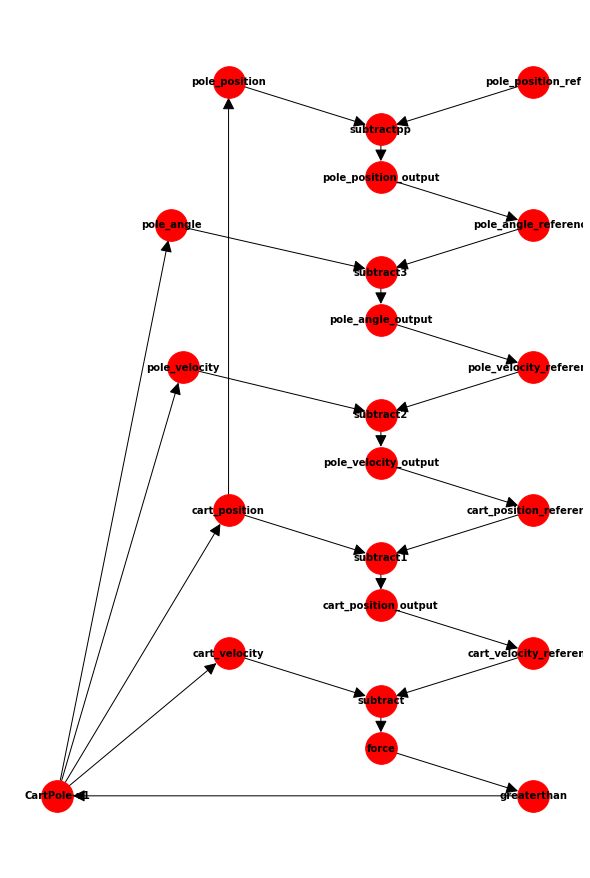

In [ ]:
cartpole_hierarchy.draw(font_size=10, figsize=(8,12), move={'CartPole-v1': [-0.075, 0] , 'pole_velocity': [-0.02, 0], 'pole_angle': [-0.025, 0]}, node_size=1000)

In [ ]:
cartpole_hierarchy.save("cartpole5-added.json")

TypeError: Object of type ndarray is not JSON serializable

In [ ]:
cartpole_hierarchy.run(100, verbose=True)

0.004 -0.212 -0.003 0.318 0.004 -0.212 -0.003 0.318 1.0 False {} 
pole_position 1.000 0.004 0.996 0.125 
pole_angle 0.125 -0.003 0.003 0.011 
pole_velocity 0.011 0.318 -0.306 -0.276 
cart_position -0.276 0.004 -0.279 -0.559 
cart_velocity -0.559 -0.212 -0.347 0.004 
1.000 

-0.001 -0.017 0.003 0.024 -0.001 -0.017 0.003 0.024 1.0 False {} 
pole_position 1.000 0.004 0.996 0.125 
pole_angle 0.125 0.003 -0.003 -0.011 
pole_velocity -0.011 0.024 -0.035 -0.304 
cart_position -0.304 -0.001 -0.304 -0.607 
cart_velocity -0.607 -0.017 -0.590 0.010 
1.000 

-0.001 0.178 0.004 -0.268 -0.001 0.178 0.004 -0.268 1.0 False {} 
pole_position 1.000 -0.001 1.001 0.125 
pole_angle 0.125 0.004 -0.004 -0.013 
pole_velocity -0.013 -0.268 0.255 -0.071 
cart_position -0.071 -0.001 -0.070 -0.141 
cart_velocity -0.141 0.178 -0.319 0.012 
1.000 

0.003 0.374 -0.002 -0.559 0.003 0.374 -0.002 -0.559 1.0 False {} 
pole_position 1.000 -0.001 1.001 0.125 
pole_angle 0.125 -0.002 0.002 0.006 
pole_velocity 0.006 -0.559

C:\Users\ryoung\.conda\envs\pctdev\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


 
1.000 

-0.154 0.541 0.255 -0.262 0.688 1.383 1.096 0.579 0.0 True {} 
pole_position 1.000 -0.161 1.161 0.125 
pole_angle 0.125 0.255 -0.255 -0.892 
pole_velocity -0.892 -0.262 -0.630 -16.478 
cart_position -16.478 -0.154 -16.324 -32.649 
cart_velocity -32.649 0.541 -33.190 1.381 
1.000 

-0.143 0.732 0.250 -0.465 0.699 1.574 1.091 0.376 0.0 True {} 
pole_position 1.000 -0.154 1.154 0.125 
pole_angle 0.125 0.250 -0.250 -0.874 
pole_velocity -0.874 -0.465 -0.409 -16.681 
cart_position -16.681 -0.143 -16.538 -33.077 
cart_velocity -33.077 0.732 -33.809 1.458 
1.000 

-0.128 0.923 0.240 -0.670 0.713 1.765 1.082 0.171 0.0 True {} 
pole_position 1.000 -0.143 1.143 0.125 
pole_angle 0.125 0.240 -0.240 -0.841 
pole_velocity -0.841 -0.670 -0.171 -16.668 
cart_position -16.668 -0.128 -16.540 -33.081 
cart_velocity -33.081 0.923 -34.004 1.519 
1.000 

-0.110 1.114 0.227 -0.878 0.732 1.956 1.068 -0.037 0.0 True {} 
pole_position 1.000 -0.128 1.128 0.125 
pole_angle 0.125 0.227 -0.227 -0.795 
po

1.191 0.025 -2.105 -6.885 2.033 0.867 -1.264 -6.044 0.0 True {} 
pole_position 1.000 1.186 -0.186 -0.079 
pole_angle -0.079 -2.105 2.105 7.368 
pole_velocity 7.368 -6.885 14.254 153.099 
cart_position 153.099 1.191 151.908 303.816 
cart_velocity 303.816 0.025 303.790 -12.230 
0.000 

1.192 -0.204 -2.243 -7.313 2.033 0.638 -1.401 -6.472 0.0 True {} 
pole_position 1.000 1.191 -0.191 -0.080 
pole_angle -0.080 -2.243 2.243 7.850 
pole_velocity 7.850 -7.313 15.164 165.215 
cart_position 165.215 1.192 164.024 328.047 
cart_velocity 328.047 -0.204 328.251 -13.275 
0.000 

1.188 -0.436 -2.389 -7.760 2.029 0.405 -1.548 -6.919 0.0 True {} 
pole_position 1.000 1.192 -0.192 -0.081 
pole_angle -0.081 -2.389 2.389 8.362 
pole_velocity 8.362 -7.760 16.123 178.074 
cart_position 178.074 1.188 176.886 353.772 
cart_velocity 353.772 -0.436 354.208 -14.384 
0.000 

1.179 -0.670 -2.544 -8.218 2.020 0.171 -1.703 -7.377 0.0 True {} 
pole_position 1.000 1.188 -0.188 -0.079 
pole_angle -0.079 -2.544 2.544 8.9

-1.111 -6.496 -7.647 -5.452 -0.270 -5.654 -6.806 -4.610 0.0 True {} 
pole_position 1.000 -0.985 1.985 0.125 
pole_angle 0.125 -7.647 7.647 26.766 
pole_velocity 26.766 -5.452 32.218 841.837 
cart_position 841.837 -1.111 842.948 1685.896 
cart_velocity 1685.896 -6.496 1692.392 -78.490 
0.000 

-1.241 -6.702 -7.756 -5.676 -0.399 -5.860 -6.915 -4.834 0.0 True {} 
pole_position 1.000 -1.111 2.111 0.125 
pole_angle 0.125 -7.756 7.756 27.148 
pole_velocity 27.148 -5.676 32.824 862.960 
cart_position 862.960 -1.241 864.201 1728.402 
cart_velocity 1728.402 -6.702 1735.104 -80.556 
0.000 

-1.375 -6.912 -7.870 -5.938 -0.534 -6.070 -7.029 -5.096 0.0 True {} 
pole_position 1.000 -1.241 2.241 0.125 
pole_angle 0.125 -7.870 7.870 27.545 
pole_velocity 27.545 -5.938 33.483 884.465 
cart_position 884.465 -1.375 885.840 1771.680 
cart_velocity 1771.680 -6.912 1778.591 -82.649 
0.000 

-1.513 -7.126 -7.989 -6.237 -0.672 -6.284 -7.147 -5.396 0.0 True {} 
pole_position 1.000 -1.375 2.375 0.125 
pole_angl

0

In [ ]:
cartpole.close()